In [1]:
import pyfiles.HFSAnalyzer as HFSA
reload(HFSA)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
sns.set_context('talk')
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_palette('colorblind')
%matplotlib inline

df = HFSA.add_Dir_to_pickle_df("HFSDataFrame.pickle", moveto="Archive")
df2 = df[df['Nk']==57]

Directory is Empty, df is unchanged


In [2]:
"""
reload(HFSA)
fig = plt.figure(figsize=(7,7))
axplot = HFSA.axplot_1stBZ
kwargs = {'spec_alpha' : 0.5 , 'scale' : 1.05, 'labels' : True}
fig, axes = HFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, axplot, **kwargs)
plt.tight_layout()
#fig.tight_layout(pad=1.3)
plt.savefig('../images/1stBZ.eps', format='eps', transparent=True)
plt.show()

fig = plt.figure(figsize=(7,7))
axplot = HFSA.axplot_exc_hist
fig, axes =  HFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, axplot)
plt.tight_layout()
fig.tight_layout(pad=1.3)
plt.locator_params(nbins=5)
plt.savefig('../images/exchist.eps', format='eps', transparent=True)
plt.show()

fig = plt.figure(figsize=(7,7))
HFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, HFSA.axplot_energy_compare)
plt.tight_layout()
#fig.tight_layout(pad=1.3)
plt.savefig('../images/energycompare.eps', format='eps', transparent=True)
plt.show()
"""

"\nreload(HFSA)\nfig = plt.figure(figsize=(7,7))\naxplot = HFSA.axplot_1stBZ\nkwargs = {'spec_alpha' : 0.5 , 'scale' : 1.05, 'labels' : True}\nfig, axes = HFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, axplot, **kwargs)\nplt.tight_layout()\n#fig.tight_layout(pad=1.3)\nplt.savefig('../images/1stBZ.eps', format='eps', transparent=True)\nplt.show()\n\nfig = plt.figure(figsize=(7,7))\naxplot = HFSA.axplot_exc_hist\nfig, axes =  HFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, axplot)\nplt.tight_layout()\nfig.tight_layout(pad=1.3)\nplt.locator_params(nbins=5)\nplt.savefig('../images/exchist.eps', format='eps', transparent=True)\nplt.show()\n\nfig = plt.figure(figsize=(7,7))\nHFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, HFSA.axplot_energy_compare)\nplt.tight_layout()\n#fig.tight_layout(pad=1.3)\nplt.savefig('../images/energycompare.eps', format='eps', transparent=True)\nplt.show()\n"

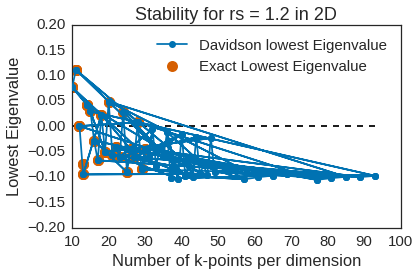

In [3]:
df = df[np.isclose(df['rs'].as_matrix(), 1.2)]

fig = plt.figure()
HFSA.plot_dav_vs_full(df)
plt.gca().set_xlim(10, 100)
plt.gca().set_ylim(-0.2, 0.2)
fig.tight_layout(pad=1.3)
plt.savefig('../images/dav_vs_exact.eps', format='eps', transparent=True)
plt.show()

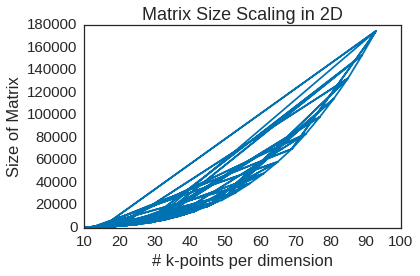

In [4]:
fig = plt.figure()
Nexcs = df.Nexc.as_matrix()
Nks = df.Nk.as_matrix()
plt.plot(Nks, 2*Nexcs)
plt.xlabel('# k-points per dimension')
plt.ylabel('Size of Matrix')
plt.title('Matrix Size Scaling in 2D')
fig.tight_layout(pad=1.3)
plt.savefig('../images/matscale.eps', format='eps', transparent=True)
plt.show()

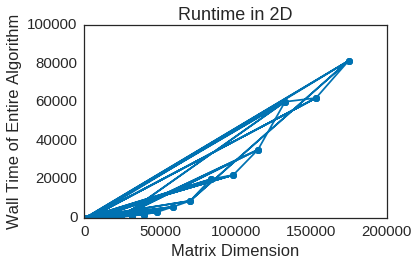

In [5]:
Walltime = [float(s.split()[0]) for s in df['Total Elapsed Time']]
Nexcs = df.Nexc.as_matrix()
fig = plt.figure()
plt.title('Runtime in 2D')
plt.xlabel('Matrix Dimension')
plt.ylabel('Wall Time of Entire Algorithm')
plt.plot(2*Nexcs, Walltime, 'o-')
fig.tight_layout(pad=1.8)
plt.locator_params(nbins=5)
plt.savefig('../images/overallruntime.eps', format='eps', transparent=True)
plt.show()

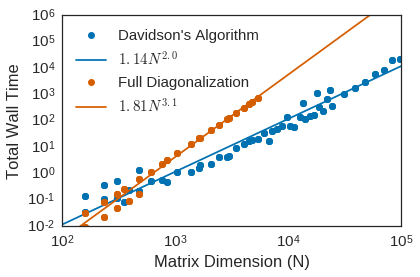

In [6]:
Nmat = 2 * df.Nexc.as_matrix()
Davtimes =  df.Dav_time.as_matrix()

df_with_fulldiags = df[df['full_diag_min'].notnull()]
fulltimes = df_with_fulldiags.full_diag_time.as_matrix()
Nmatfull = 2 * df_with_fulldiags.Nexc.as_matrix()

xmax = 1e5
xmin = 1e2
Nfit = np.linspace(xmin, xmax, 500)

npts = 20
c = np.polyfit(np.log10(Nmatfull), np.log10(fulltimes), 1)
fit = 10**(c[1]) * Nfit ** (c[0])


cdav = np.polyfit(np.log10(Nmat), np.log10(Davtimes), 1)
davfit = 10**(cdav[1]) * Nfit ** (cdav[0])

fig = plt.figure()
plt.plot(Nmat, Davtimes, 'o', label="Davidson's Algorithm", c=sns.color_palette()[0])
fitlabel = "$" + str(10**cdav[1])[:4] + " N^ {" + str(cdav[0])[:3] + "}$"
plt.plot(Nfit, davfit, c=sns.color_palette()[0], label=fitlabel)
plt.plot(Nmatfull, fulltimes, 'o', label='Full Diagonalization', c=sns.color_palette()[2])
fitlabel = "$" + str(10**c[1])[:4] + " N^{" + str(c[0])[:3] + "}$"
plt.plot(Nfit, fit, c=sns.color_palette()[2], label=fitlabel)
plt.xlabel('Matrix Dimension (N)')
plt.ylabel('Total Wall Time')
plt.legend(loc='best')

ax = plt.gca()
ax.set_xlim([xmin, xmax])
ax.set_ylim([1e-2, 1e6])
ax.set_xscale("log")
ax.set_yscale("log")
fig.tight_layout(pad=1.3)
plt.savefig('../images/dav_vs_exact_scaling.eps', format='eps', transparent=True)
plt.show()

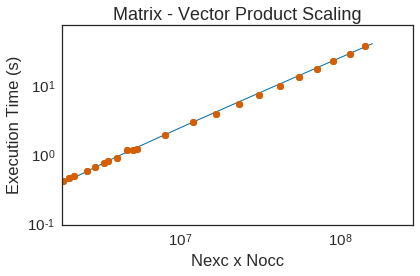

In [7]:
fig = plt.figure()
Nexcs = df['Nexc']
Noccs = df['Nocc']
mvtimes = df['Mv_time']


plt.title('Matrix - Vector Product Scaling')

sns.regplot(Nexcs*Noccs, mvtimes, ci=0.999, scatter_kws={'color' : sns.color_palette()[2], 's' : 50, 'zorder' : 2}
                                , line_kws={'zorder' : 1, 'linewidth' : 1})
plt.xlabel('Nexc x Nocc')
plt.ylabel('Execution Time (s)')
ax = plt.gca()
scale = 2
plt.xscale("log")
plt.yscale("log")
ax.set_xlim(0, np.amax(Nexcs * Noccs)*scale)
ax.set_ylim(1e-1, np.amax(mvtimes)*scale)
fig.tight_layout(pad=1.3)
plt.savefig('../images/mvscaling.eps', format='eps', transparent=True)
plt.show()

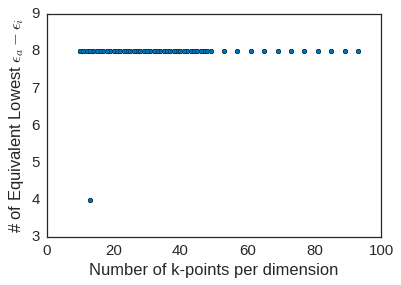

In [8]:
fig = plt.figure()
degen = df['ground_state_degeneracy']
Nks = df.Nk.as_matrix()
plt.scatter(Nks, degen, c=sns.color_palette()[0])
plt.ylabel('# of Equivalent Lowest $\epsilon_a - \epsilon_i$')
plt.xlabel('Number of k-points per dimension')
plt.show()

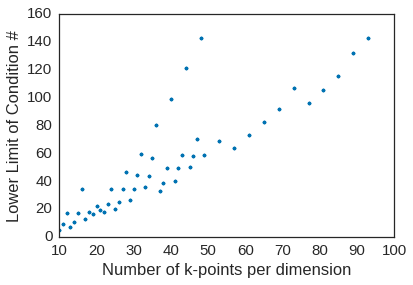

In [9]:
fig = plt.figure()
plt.plot(df['Nk'], df['cond_number'], '.')
plt.xlabel('Number of k-points per dimension')
plt.ylabel('Lower Limit of Condition #')
plt.show()

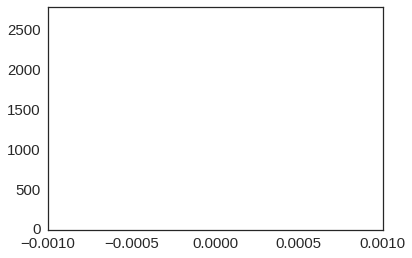

In [10]:
fig = plt.figure()
cond_n =  df['cond_number'].as_matrix()
davtime= df['Dav_time'].as_matrix()
mvtimes = df['Mv_time'].as_matrix()

plt.plot(cond_n, davtime/mvtimes, '.')
scale = 1.1
xmax = np.amax(cond_n)
ymax = np.amax(davtime/mvtimes)
plt.gca().set_xlim(0, scale*xmax)
plt.gca().set_ylim(0, scale*ymax)
plt.show()

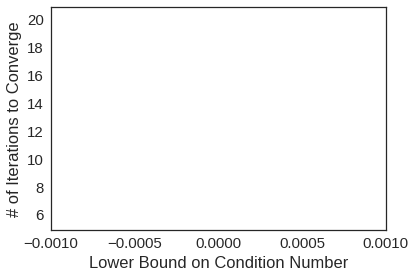

In [11]:
fig = plt.figure()
davits=df['dav_its'].as_matrix()
cond_n = df['cond_number'].as_matrix()
plt.plot(cond_n, davits, '.')
plt.gca().set_ylim(np.amin(davits)-1, np.amax(davits)+1)
plt.gca().set_xlim(np.amin(cond_n)-1, np.amax(cond_n)+1)
plt.xlabel('Lower Bound on Condition Number')
plt.ylabel('# of Iterations to Converge')
plt.show()

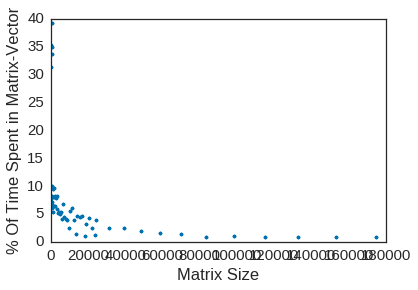

In [12]:
fig = plt.figure()

df.columns
blocksize = df['Dav_blocksize'].as_matrix()
num_guess = df['num_guess_evecs'].as_matrix()

final_subsize = num_guess + blocksize * davits

mv_total_time = final_subsize * mvtimes
non_mv = davtime - mv_total_time
matrix_size = df['Nexc'].as_matrix()*2

plt.plot(matrix_size, 100*mv_total_time/davtime,  '.')
plt.xlabel("Matrix Size")
plt.ylabel("% Of Time Spent in Matrix-Vector")

plt.show()

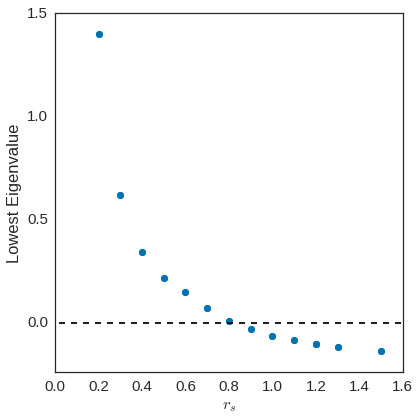

In [13]:
fig = plt.figure(figsize=(6,6))
plt.plot(df2['rs'], df2['Dav_final_val'], 'o')
plt.plot(np.linspace(-5,100,100), np.zeros(100), 'k--')
plt.gca().set_xlim(0,1.6)
pad = 0.1
plt.gca().set_ylim(np.amin(df2['Dav_final_val']) - pad , np.amax(df2['Dav_final_val']) + pad)
plt.ylabel('Lowest Eigenvalue')
plt.xlabel('$r_s$')
fig.tight_layout(pad=1.3)
plt.savefig('../images/stab_rs.eps', format='eps', transparent=True)
plt.show()